In [725]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix
import missingno as msno 
warnings.filterwarnings("ignore")

In [726]:
df = pd.read_csv('googleplaystore.csv')

In [727]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [729]:
df['App'].unique().shape

(9660,)

In [730]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [731]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [732]:
import seaborn as sns

In [733]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


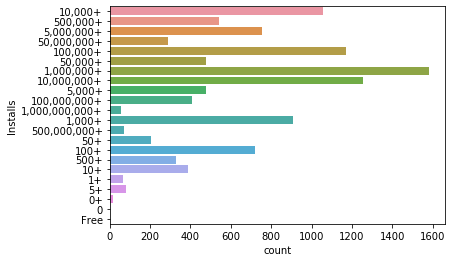

In [734]:
sns.countplot(y = 'Installs', data = df)

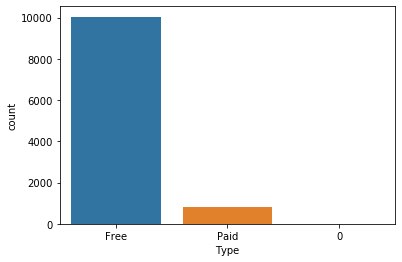

In [735]:
sns.countplot(x = 'Type', data = df)

In [736]:
df[df.Type == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [737]:
df = df[df.Type != '0']

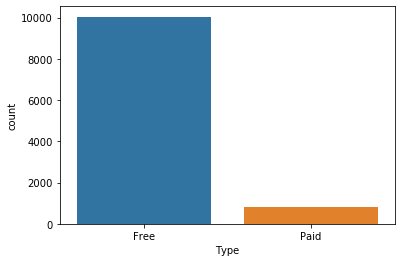

In [738]:
sns.countplot(x = 'Type', data = df)

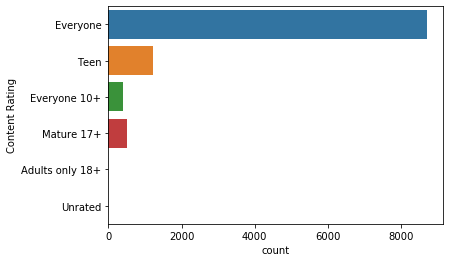

In [739]:
sns.countplot(y = 'Content Rating', data = df)

In [740]:
df[df['Content Rating'] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [741]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [742]:
df = df[df['Content Rating'] != 'Adults only 18+']

In [743]:
df = df[df['Content Rating'] != 'Unrated']

In [744]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [745]:
df.shape

(10835, 13)

In [746]:
df.describe()

,Rating
count,9362.000000
mean,4.191733
std,0.515285
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [747]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [748]:
df.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [749]:
type(df['Reviews'][0])

str

In [750]:
def string_to_integer(x):
    y = int(x)
    return y

In [751]:
k = string_to_integer('10')

In [752]:
k

10

In [753]:
type(k)

int

In [754]:
df['Reviews'] = df['Reviews'].to_frame().apply(string_to_integer, axis = 1)

In [755]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [756]:
type(df['Reviews'][0])

numpy.int64

In [757]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [758]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


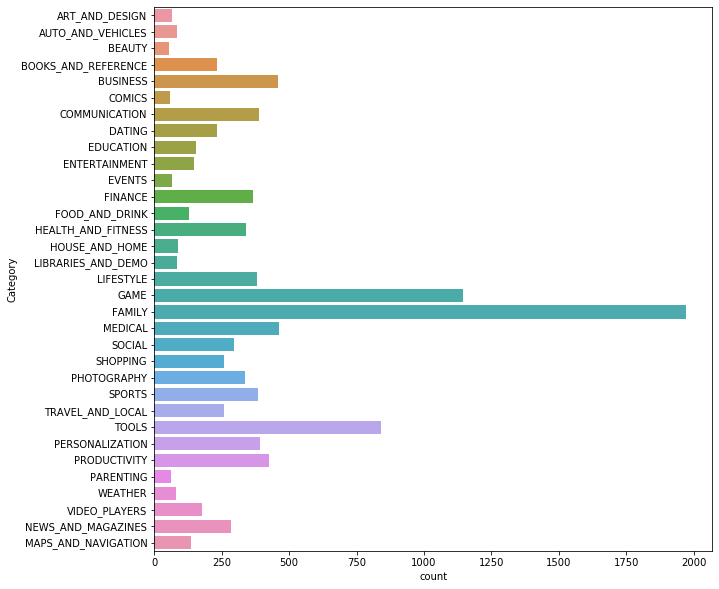

In [759]:
plt.figure(figsize = (10, 10))
sns.countplot(y = df['Category'], data = df)

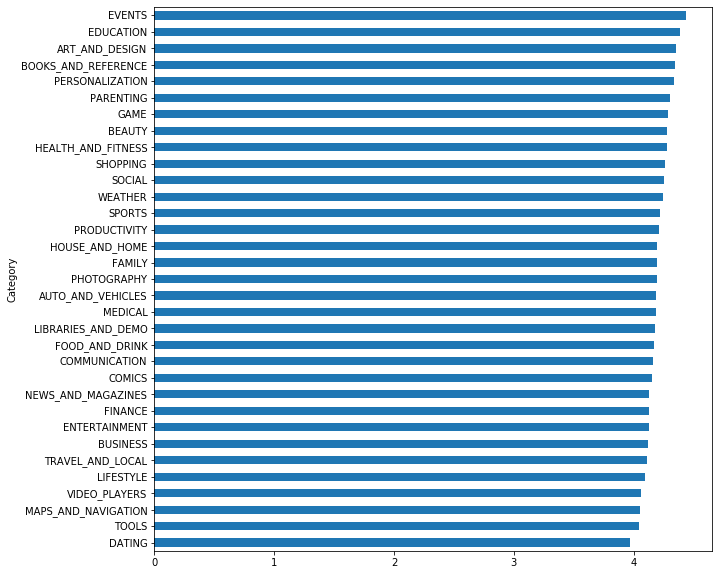

In [760]:
plt.figure(figsize = (10, 10))
df.groupby('Category').mean()['Rating'].sort_values(ascending = True).plot(kind = 'barh')

In [761]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


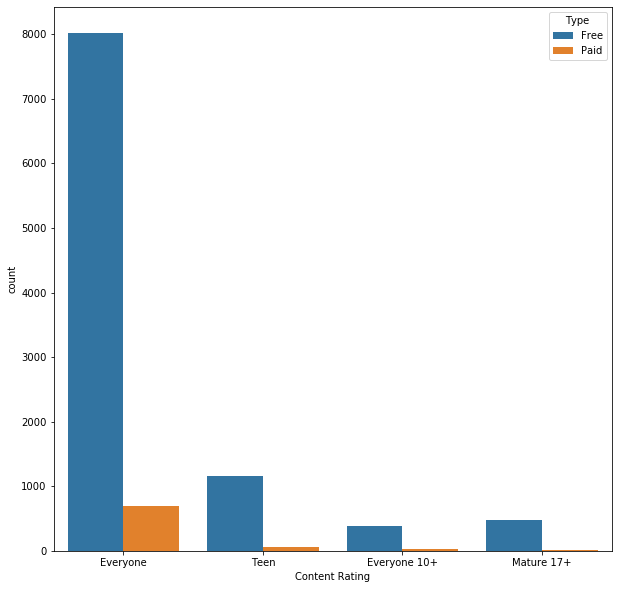

In [762]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Content Rating', data = df, hue = 'Type')

In [763]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


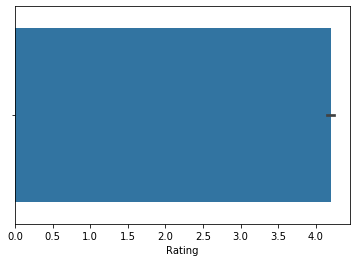

In [764]:
sns.barplot(df.groupby('Content Rating').mean()['Rating'])

In [765]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [766]:
df['Last Updated'].nunique()

1376

In [767]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [768]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [769]:
df.drop(['App'], inplace = True, axis = 1)

In [770]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [771]:
df.drop(['Genres', 'Last Updated'], axis = 1, inplace = True)

In [772]:
df.drop(['Current Ver', 'Android Ver'], axis = 1, inplace = True)

In [773]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [774]:
df.shape

(10835, 8)

In [775]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


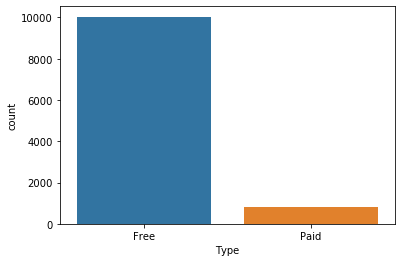

In [776]:
sns.countplot(df['Type'])

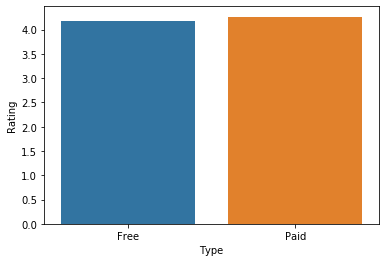

In [777]:
sns.barplot(y = df.groupby('Type').mean()['Rating'], x = df.groupby('Type').mean()['Rating'].index)

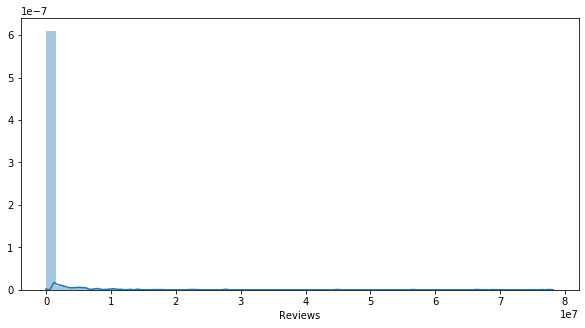

In [778]:
plt.figure(figsize = (10, 5))
sns.distplot(df['Reviews'])

In [779]:
import missingno as mn

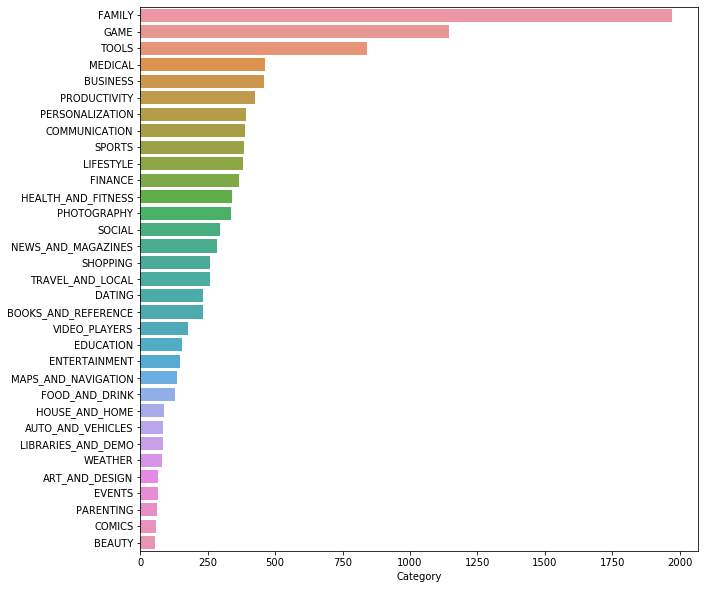

In [780]:
plt.figure(figsize = (10, 10))
sns.barplot(x = df['Category'].value_counts(), y = df['Category'].value_counts().index)

In [781]:
df_new = pd.concat([df, pd.get_dummies(df['Type'])], axis = 1)

In [782]:
df_new

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Free,Paid
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,1,0
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,1,0
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,1,0
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,1,0
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,1,0
...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,1,0
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,1,0
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,1,0
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,1,0


In [783]:
pd.get_dummies(df[['Type', 'Content Rating']])

,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,1,0,1,0,0,0
1,1,0,1,0,0,0
2,1,0,1,0,0,0
3,1,0,0,0,0,1
4,1,0,1,0,0,0
...,...,...,...,...,...,...
10836,1,0,1,0,0,0
10837,1,0,1,0,0,0
10838,1,0,1,0,0,0
10839,1,0,0,0,1,0


In [784]:
from random import shuffle

In [785]:
df.isnull().sum()

Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
dtype: int64

In [786]:
df[df['Rating'].isnull() == True]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
23,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone
113,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+
123,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone
126,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen
129,BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+
...,...,...,...,...,...,...,...,...
10824,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone
10825,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen
10831,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone
10835,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone


In [787]:
type(df['Rating'])

pandas.core.series.Series

In [788]:
df[df['Rating'].isnull() == False]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+


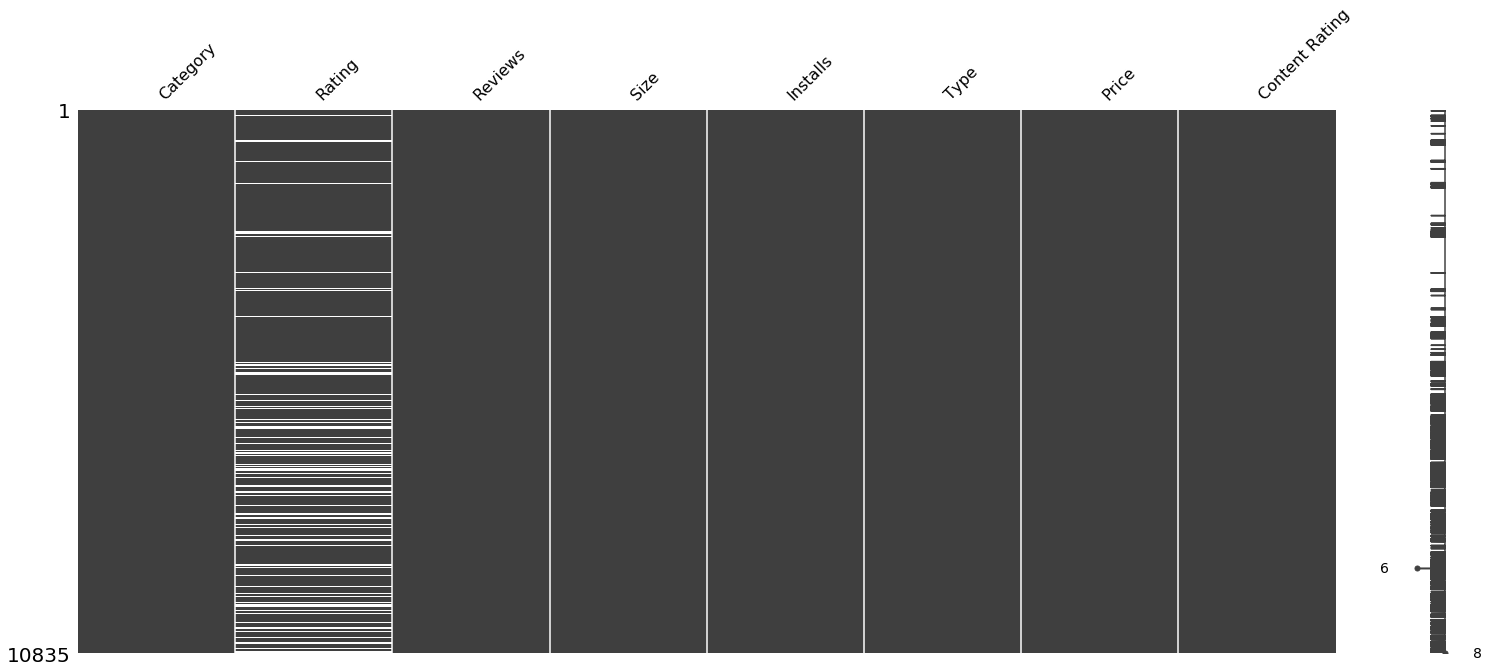

In [789]:
msno.matrix(df)

In [790]:
df['Rating'].isnull() 

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10835, dtype: bool

In [791]:
df['Rating'].mean()

4.191732535782958

In [792]:
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

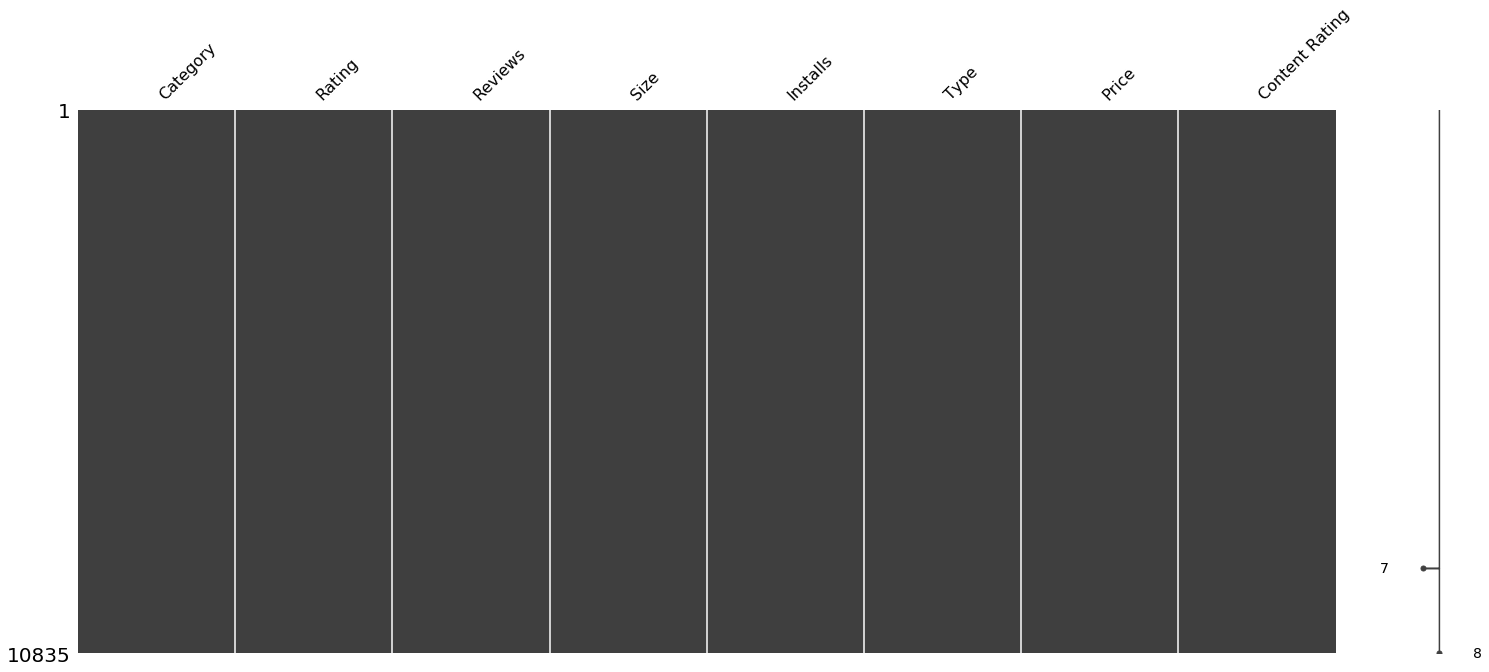

In [793]:
msno.matrix(df)

In [794]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10840
Data columns (total 8 columns):
Category          10835 non-null object
Rating            10835 non-null float64
Reviews           10835 non-null int64
Size              10835 non-null object
Installs          10835 non-null object
Type              10834 non-null object
Price             10835 non-null object
Content Rating    10835 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ MB


In [796]:
from random import shuffle 

In [797]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [798]:
df[df.index == 5562]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
5562,FAMILY,3.7,22,90M,"5,000+",Free,0,Everyone


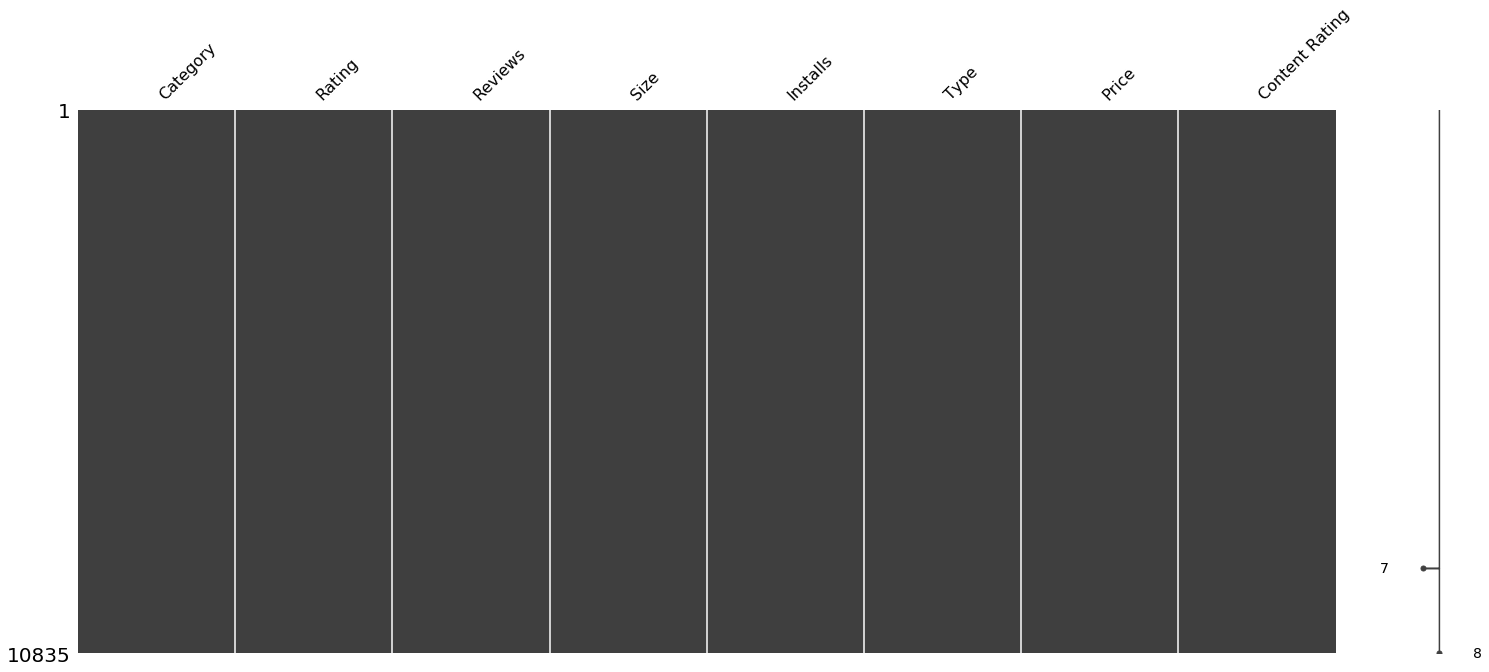

In [799]:
msno.matrix(df)

In [800]:
import category_encoders as ce

In [801]:
encoder = ce.PolynomialEncoder(cols = ["Installs", "Type", "Content Rating"])

In [802]:
encoder.fit_transform(df)

,intercept,Category,Rating,Reviews,Size,Installs_0,Installs_1,Installs_2,Installs_3,Installs_4,...,Installs_16,Installs_17,Installs_18,Installs_19,Type_0,Type_1,Price,Content Rating_0,Content Rating_1,Content Rating_2
0,1,ART_AND_DESIGN,4.100000,159,19M,-0.360375,0.422855,-0.433298,4.051476e-01,-0.351368,...,-0.000257,0.000073,-0.000017,0.000003,-0.707107,0.408248,0,-0.670820,0.5,-0.223607
1,1,ART_AND_DESIGN,3.900000,967,14M,-0.324337,0.295999,-0.173319,3.261797e-16,0.175684,...,0.003674,-0.001180,0.000303,-0.000054,-0.707107,0.408248,0,-0.670820,0.5,-0.223607
2,1,ART_AND_DESIGN,4.700000,87510,8.7M,-0.288300,0.182495,0.018244,-2.132356e-01,0.314381,...,-0.023844,0.008778,-0.002557,0.000512,-0.707107,0.408248,0,-0.670820,0.5,-0.223607
3,1,ART_AND_DESIGN,4.500000,215644,25M,-0.252262,0.082346,0.148994,-2.843141e-01,0.237327,...,0.091906,-0.039807,0.013423,-0.003070,-0.707107,0.408248,0,-0.223607,-0.5,0.670820
4,1,ART_AND_DESIGN,4.300000,967,2.8M,-0.216225,-0.004451,0.226531,-2.571370e-01,0.071434,...,-0.229751,0.121816,-0.048897,0.013050,-0.707107,0.408248,0,-0.670820,0.5,-0.223607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,1,FAMILY,4.500000,38,53M,-0.072075,-0.218104,0.156595,1.609719e-01,-0.221554,...,0.249843,0.136016,-0.423771,0.339289,-0.707107,0.408248,0,-0.670820,0.5,-0.223607
10837,1,FAMILY,5.000000,4,3.6M,0.144150,-0.137984,-0.252377,-5.435416e-02,0.213395,...,0.363408,0.391606,0.260782,0.104396,-0.707107,0.408248,0,-0.670820,0.5,-0.223607
10838,1,MEDICAL,4.191733,3,9.5M,0.036037,-0.238134,-0.082099,2.257788e-01,0.127276,...,0.306626,0.197547,-0.282514,-0.452385,-0.707107,0.408248,0,-0.670820,0.5,-0.223607
10839,1,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,0.036037,-0.238134,-0.082099,2.257788e-01,0.127276,...,0.306626,0.197547,-0.282514,-0.452385,-0.707107,0.408248,0,0.670820,0.5,0.223607


In [803]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...
10836,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone
10837,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone
10838,MEDICAL,4.191733,3,9.5M,"1,000+",Free,0,Everyone
10839,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+


In [804]:
type(df['Size'][0])

str

In [805]:
df['Installs'].nunique()

21

In [806]:
order = {'10,000+': 10, '500,000+': 13, '5,000,000+': 15, '50,000,000+': 17, '100,000+': 12,
       '50,000+': 11, '1,000,000+': 14, '10,000,000+': 16, '5,000+': 9, '100,000,000+': 18,
       '1,000,000,000+': 19, '1,000+': 8, '500,000,000+': 20, '50+': 5, '100+': 6, '500+': 7,
       '10+': 4, '1+': 2, '5+': 3, '0+': 1, '0': 0}
df['mapped_data'] = df['Installs'].map(order)

In [807]:
df['Installs'] = df['mapped_data']

In [808]:
df.drop(['mapped_data'], inplace = True, axis = 1)

In [809]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,10,Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,13,Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,15,Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,17,Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,12,Free,0,Everyone


In [810]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,10,Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,13,Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,15,Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,17,Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,12,Free,0,Everyone


In [811]:
import category_encoders as ce

In [812]:
encoder = ce.OneHotEncoder(use_cat_names = True)

In [813]:
encoded_output = encoder.fit_transform(df[['Size', 'Type', 'Content Rating']], axis = 1)

In [814]:
encoded_output.head()

,Size_19M,Size_14M,Size_8.7M,Size_25M,Size_2.8M,Size_5.6M,Size_29M,Size_33M,Size_3.1M,Size_28M,...,Size_1020k,Size_582k,Size_619k,Type_Free,Type_Paid,Type_nan,Content Rating_Everyone,Content Rating_Teen,Content Rating_Everyone 10+,Content Rating_Mature 17+
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [815]:
df.drop(['Size', 'Type', 'Content Rating'], inplace = True, axis = 1)

In [816]:
df.head()

,Category,Rating,Reviews,Installs,Price
0,ART_AND_DESIGN,4.1,159,10,0
1,ART_AND_DESIGN,3.9,967,13,0
2,ART_AND_DESIGN,4.7,87510,15,0
3,ART_AND_DESIGN,4.5,215644,17,0
4,ART_AND_DESIGN,4.3,967,12,0


In [817]:
df = pd.concat([df, encoded_output], axis = 1)

In [818]:
df.head()

,Category,Rating,Reviews,Installs,Price,Size_19M,Size_14M,Size_8.7M,Size_25M,Size_2.8M,...,Size_1020k,Size_582k,Size_619k,Type_Free,Type_Paid,Type_nan,Content Rating_Everyone,Content Rating_Teen,Content Rating_Everyone 10+,Content Rating_Mature 17+
0,ART_AND_DESIGN,4.1,159,10,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,ART_AND_DESIGN,3.9,967,13,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,ART_AND_DESIGN,4.7,87510,15,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,ART_AND_DESIGN,4.5,215644,17,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,ART_AND_DESIGN,4.3,967,12,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [819]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10840
Columns: 473 entries, Category to Content Rating_Mature 17+
dtypes: float64(1), int64(470), object(2)
memory usage: 39.5+ MB


In [820]:
encoder = ce.OrdinalEncoder()

In [821]:
encoded_output = encoder.fit_transform(df['Category'])

In [823]:
df.drop(['Category'], inplace = True, axis = 1)

In [824]:
df.head()

,Rating,Reviews,Installs,Price,Size_19M,Size_14M,Size_8.7M,Size_25M,Size_2.8M,Size_5.6M,...,Size_1020k,Size_582k,Size_619k,Type_Free,Type_Paid,Type_nan,Content Rating_Everyone,Content Rating_Teen,Content Rating_Everyone 10+,Content Rating_Mature 17+
0,4.1,159,10,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,3.9,967,13,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,4.7,87510,15,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4.5,215644,17,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4.3,967,12,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [825]:
pd.concat([df, encoded_output], axis = 1)

,Rating,Reviews,Installs,Price,Size_19M,Size_14M,Size_8.7M,Size_25M,Size_2.8M,Size_5.6M,...,Size_582k,Size_619k,Type_Free,Type_Paid,Type_nan,Content Rating_Everyone,Content Rating_Teen,Content Rating_Everyone 10+,Content Rating_Mature 17+,Category
0,4.100000,159,10,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,3.900000,967,13,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,4.700000,87510,15,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,4.500000,215644,17,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,4.300000,967,12,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.500000,38,9,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,19
10837,5.000000,4,6,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,19
10838,4.191733,3,8,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,20
10839,4.500000,114,8,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,4


In [826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10840
Columns: 472 entries, Rating to Content Rating_Mature 17+
dtypes: float64(1), int64(470), object(1)
memory usage: 39.4+ MB
